
# Churn exploratory data analysis

**Notebook objectives**

- Check data quality
- Amend any data quality issues
- Identify trends or patterns that may help modelling
- Provide initial insights

### Table of Contents

1. [Dependencies](#Dependencies)
2. [Data cleaning](#Datacleaning)
3. [Data profiling](#Dataprofiling)
4. [Data exploration](#Dataexploration)

### 1. Dependencies <a class="anchor" id="Dependencies"></a>

Import the dependencies required to run this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from pandas_profiling import ProfileReport

### 2. Data cleaning <a class="anchor" id="Datacleaning"></a>

Read in data

In [2]:
df =pd.read_csv('../01 Data/churn_challenge.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look at the data types

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Convert the TotalCharges column to a numeric data type

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Check for null values

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.shape

(7043, 21)

There are only 11 out 7043 rows which contain nulls, we will delete them

In [8]:
df.dropna(inplace = True)
# Remove customer IDs from the data set
df2 = df.iloc[:,1:]

Create buckets for the monthly charges

In [9]:
# create a list of  buckets for monthly charges
mthly_bckts = [
    (df['MonthlyCharges'] <= 25),
    (df['MonthlyCharges'] > 25) & (df['MonthlyCharges'] <= 50),
    (df['MonthlyCharges'] > 50) & (df['MonthlyCharges'] <= 75),
    (df['MonthlyCharges'] > 75) & (df['MonthlyCharges'] <= 100),
    (df['MonthlyCharges'] > 100)
    ]

# create labels to assign to each bucket
labels = ['0 - 25', '25 - 50', '50 - 75', '75 - 100', '100 +']

# create a new column and use np.select to assign labels using the buckets
df['MonthlyChargesBuckets'] = np.select(mthly_bckts, labels)

# display updated DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesBuckets
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,25 - 50
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,50 - 75
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,50 - 75
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,25 - 50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,50 - 75


Create buckets for the total charges

In [10]:
# create buckets for total charges
ttl_bckts = [
    (df['TotalCharges'] <= 2000),
    (df['TotalCharges'] > 2000) & (df['TotalCharges'] <= 4000),
    (df['TotalCharges'] > 4000) & (df['TotalCharges'] <= 6000),
    (df['TotalCharges'] > 6000) & (df['TotalCharges'] <= 8000),
    (df['TotalCharges'] > 8000)
    ]

# create labels to assign to each bucket
labels = ['0 - 2000', '2000 - 4000', '4000 - 6000', '6000 - 8000', '8000 +']

# create a new column and use np.select to assign labels using the buckets
df['TotalChargesBuckets'] = np.select(ttl_bckts, labels)

# display updated DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesBuckets,TotalChargesBuckets
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,25 - 50,0 - 2000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,50 - 75,0 - 2000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,50 - 75,0 - 2000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,25 - 50,0 - 2000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,50 - 75,0 - 2000


Create buckets for customer tenure

In [11]:
# create buckets for tenure
tnr_bckts = [
    (df['tenure'] <= 12),
    (df['tenure'] > 12) & (df['tenure'] <= 24),
    (df['tenure'] > 24) & (df['tenure'] <= 36),
    (df['tenure'] > 36) & (df['tenure'] <= 48),
    (df['tenure'] > 48) & (df['tenure'] <= 60),
    (df['tenure'] > 60)
    ]

# create labels to assign to each bucket
labels = ['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5','5 +']

# create a new column and use np.select to assign labels using the buckets
df['tenureBuckets'] = np.select(tnr_bckts, labels)

# display updated DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesBuckets,TotalChargesBuckets,tenureBuckets
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,25 - 50,0 - 2000,0 - 1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,50 - 75,0 - 2000,2 - 3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,50 - 75,0 - 2000,0 - 1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,25 - 50,0 - 2000,3 - 4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,50 - 75,0 - 2000,0 - 1


Create a binary flag to indicate if a customer has churned

In [12]:
df['ChurnFlag'] = np.where(df['Churn'] == 'Yes' , 1, 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesBuckets,TotalChargesBuckets,tenureBuckets,ChurnFlag
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,25 - 50,0 - 2000,0 - 1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,50 - 75,0 - 2000,2 - 3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,50 - 75,0 - 2000,0 - 1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,25 - 50,0 - 2000,3 - 4,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,50 - 75,0 - 2000,0 - 1,1


### 3. Data profiling<a class="anchor" id="Dataprofiling"></a>

Pandas profiling is a quick and easy way to explore a dataframe

In [13]:
# Generate profile using pandas profiling
profile = ProfileReport(df, title="Churn Profiling Report", explorative = True)

In [14]:
# Display profile in notebook
profile.to_widgets()

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Data exploration <a class="anchor" id="Dataexploration"></a>

Create plots to identify features which may have a considerable impact on churn

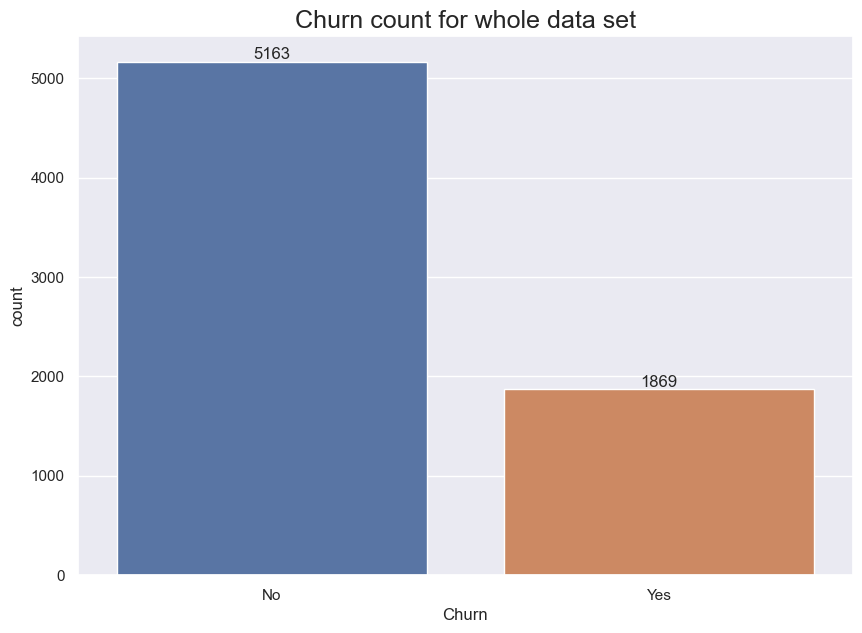

In [17]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Churn count for whole data set',fontsize = 18)
plt.savefig('../04 Output/churncount.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

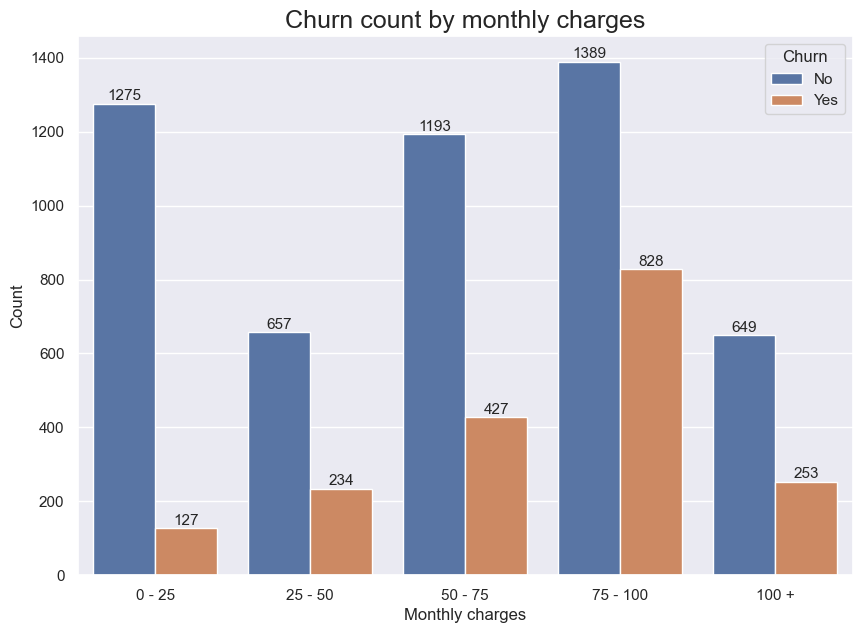

In [18]:
mbucket_order = ['0 - 25','25 - 50','50 - 75','75 - 100','100 +',]
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="MonthlyChargesBuckets", hue='Churn', data=df, order = mbucket_order)
ax.set_title('Churn count by monthly charges',fontsize = 18)
ax.set_xlabel('Monthly charges', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnmthlychrgs.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

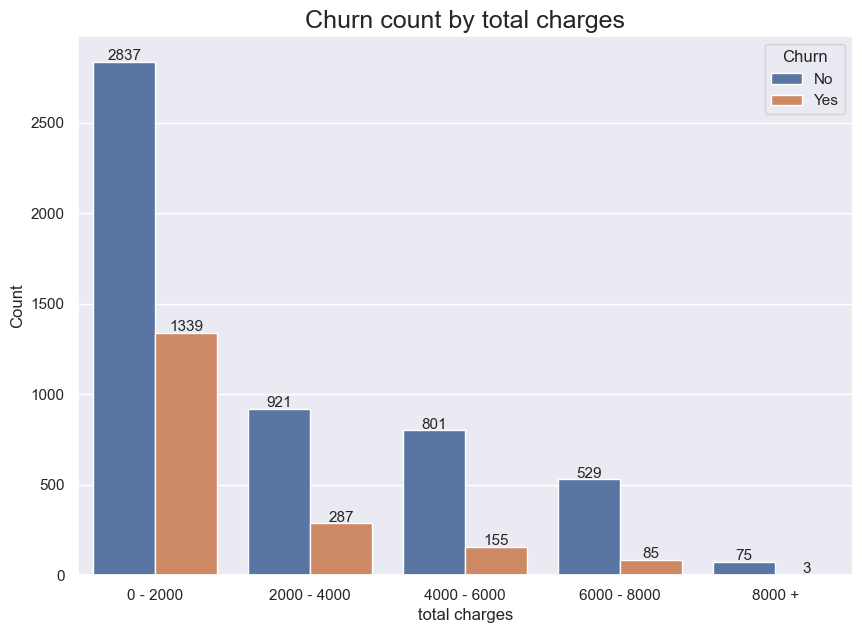

In [19]:
tcbucket_order = ['0 - 2000','2000 - 4000','4000 - 6000','6000 - 8000','8000 +']
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="TotalChargesBuckets", hue='Churn', data=df, order = tcbucket_order)
ax.set_title('Churn count by total charges',fontsize = 18 )
ax.set_xlabel('total charges', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnttlchrgs.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

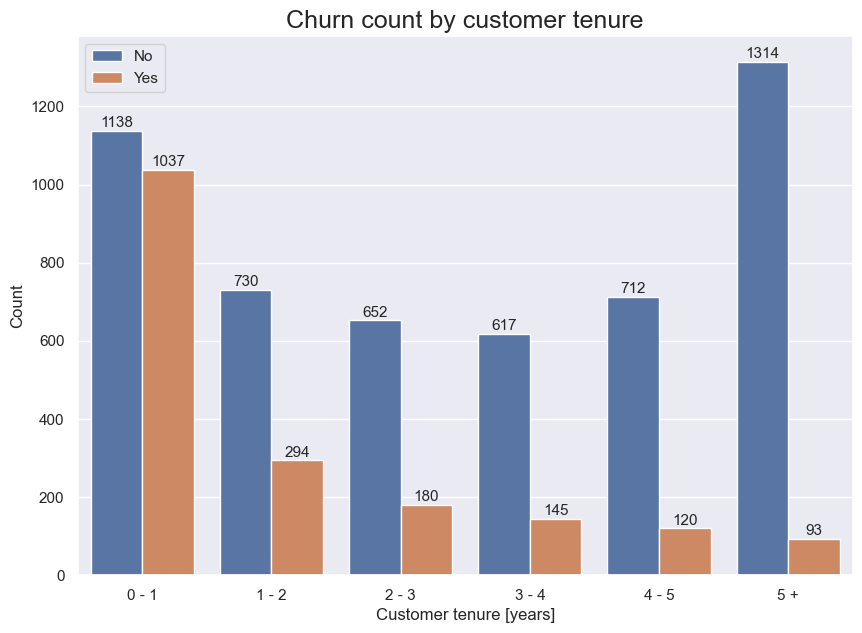

In [20]:
tnrbucket_order = ['0 - 1','1 - 2','2 - 3','3 - 4','4 - 5', '5 +']
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="tenureBuckets", hue='Churn', data=df, order = tnrbucket_order)
ax.set_title('Churn count by customer tenure',fontsize = 18 )
ax.set_xlabel('Customer tenure [years]', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.legend( loc ='best')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churncstmrtnr.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

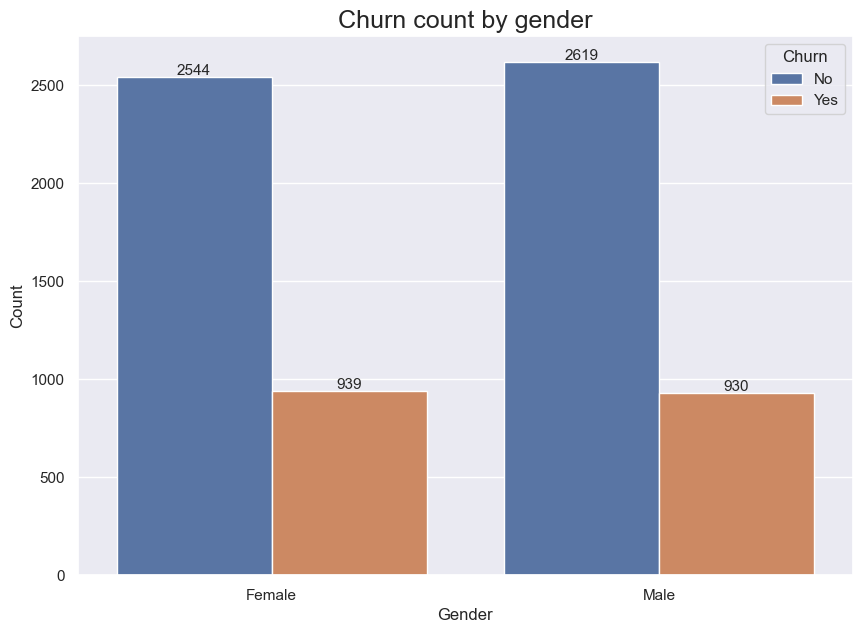

In [21]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="gender", hue='Churn', data=df)
ax.set_title('Churn count by gender',fontsize = 18 )
ax.set_xlabel('Gender', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churngndr.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

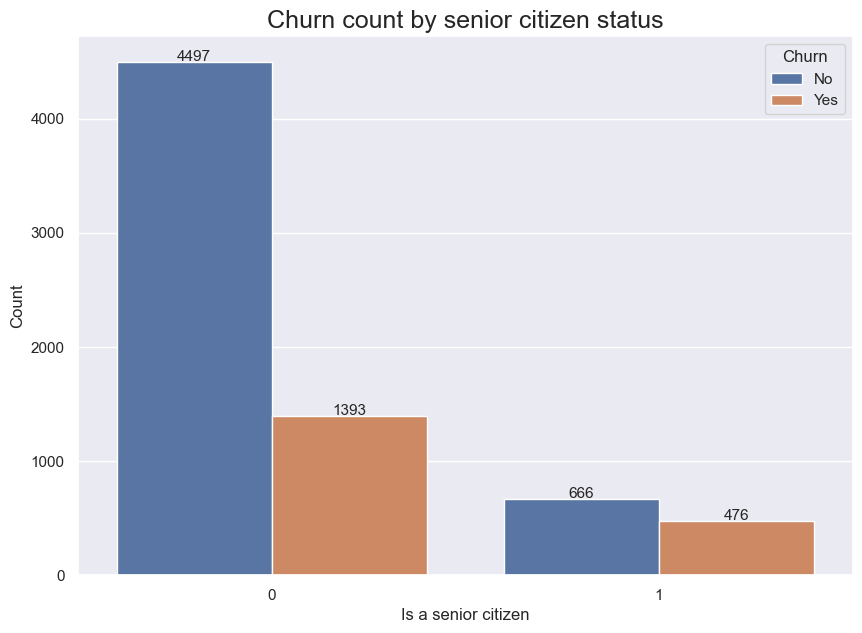

In [22]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="SeniorCitizen", hue='Churn', data=df)
ax.set_title('Churn count by senior citizen status',fontsize = 18 )
ax.set_xlabel('Is a senior citizen', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnsnrctzn.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

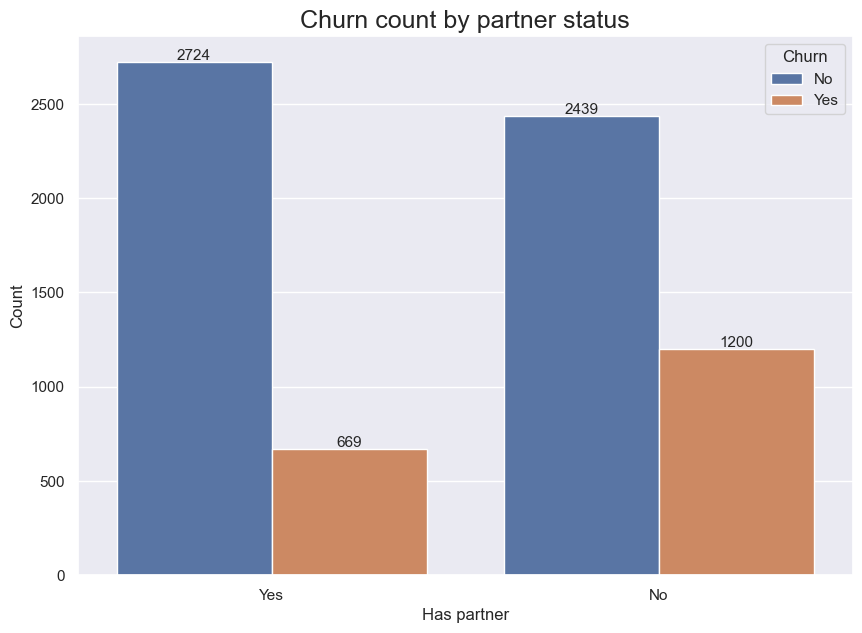

In [23]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="Partner", hue='Churn', data=df)
ax.set_title('Churn count by partner status',fontsize = 18 )
ax.set_xlabel('Has partner', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnprtnr.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

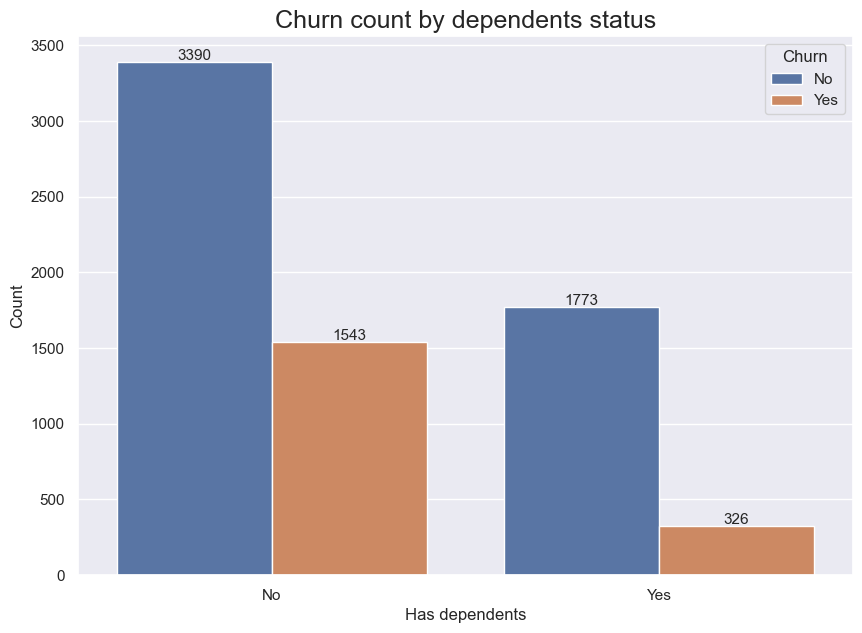

In [24]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="Dependents", hue='Churn', data=df)
ax.set_title('Churn count by dependents status',fontsize = 18 )
ax.set_xlabel('Has dependents', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churndpndnts.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

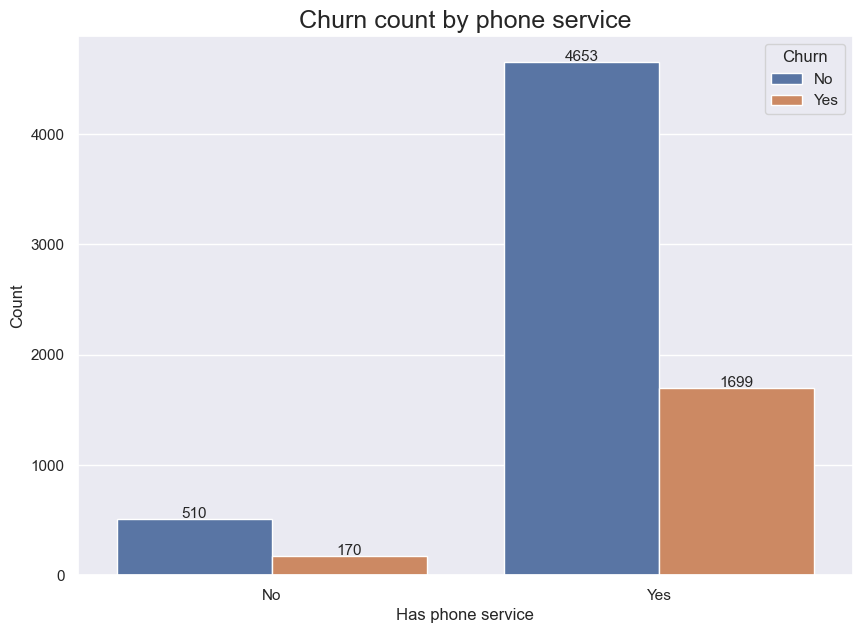

In [25]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="PhoneService", hue='Churn', data=df)
ax.set_title('Churn count by phone service',fontsize = 18 )
ax.set_xlabel('Has phone service', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnphnsrvc.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

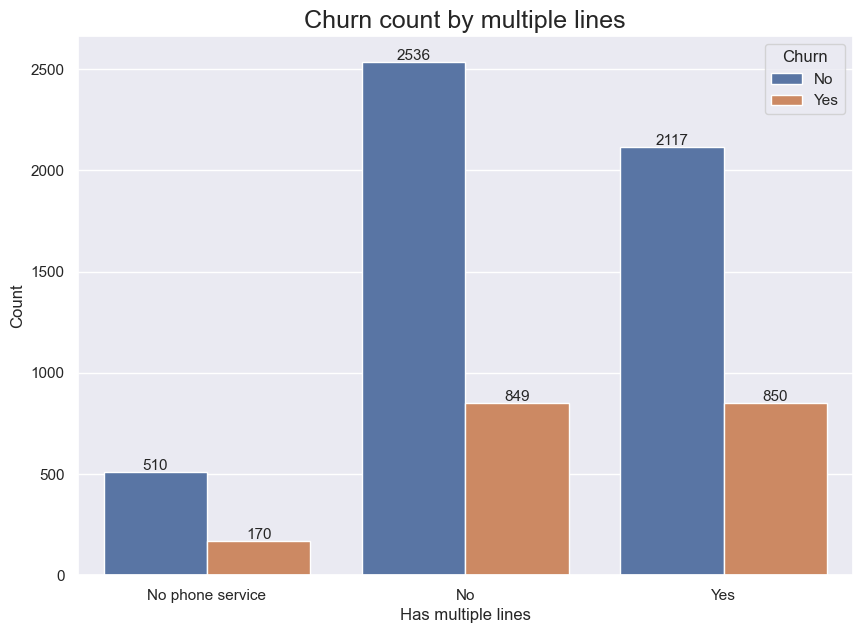

In [26]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="MultipleLines", hue='Churn', data=df)
ax.set_title('Churn count by multiple lines',fontsize = 18 )
ax.set_xlabel('Has multiple lines', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnmtpllns.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

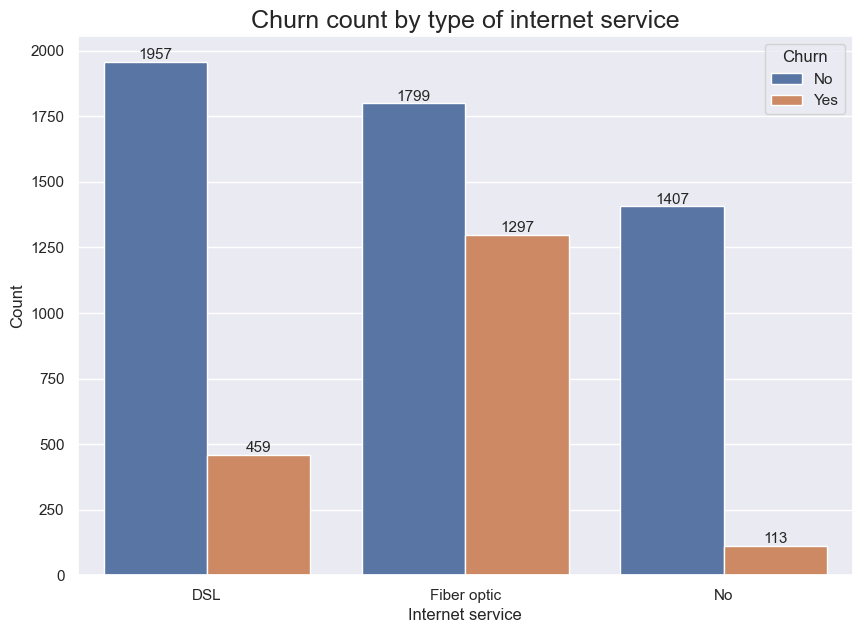

In [27]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="InternetService", hue='Churn', data=df)
ax.set_title('Churn count by type of internet service',fontsize = 18 )
ax.set_xlabel('Internet service', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnintrntsrvc.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

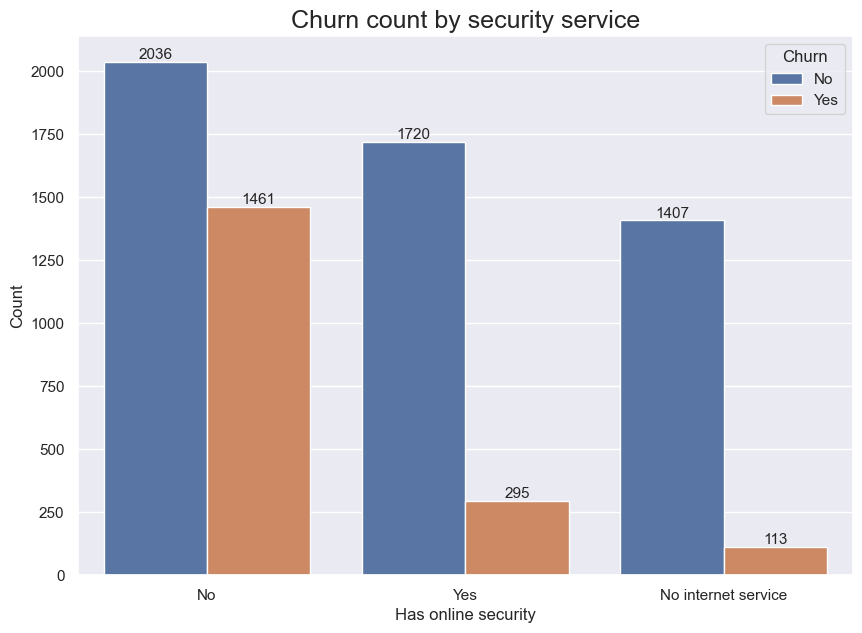

In [28]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="OnlineSecurity", hue='Churn', data=df)
ax.set_title('Churn count by security service',fontsize = 18 )
ax.set_xlabel('Has online security', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churonlnscrty.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

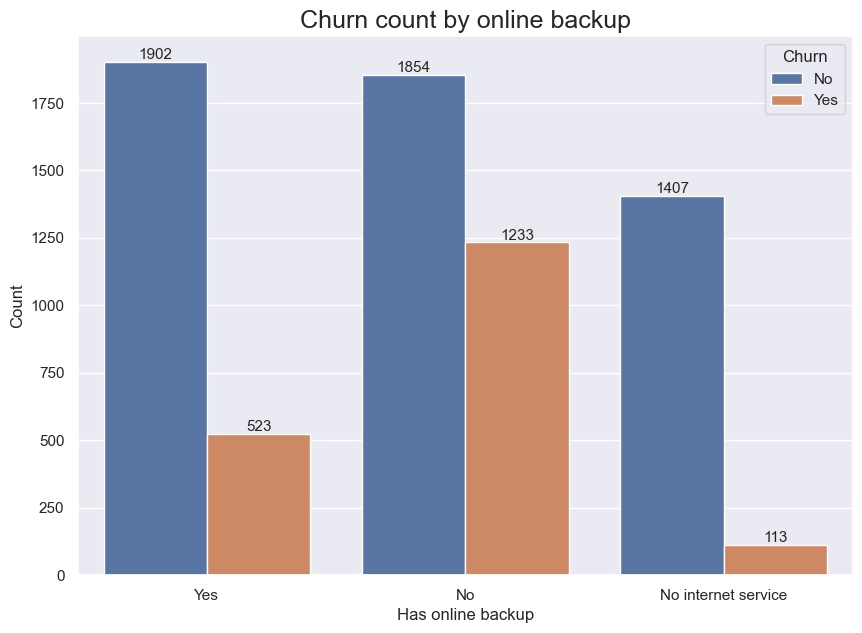

In [29]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="OnlineBackup", hue='Churn', data=df)
ax.set_title('Churn count by online backup',fontsize = 18 )
ax.set_xlabel('Has online backup', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnonlnbckp.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

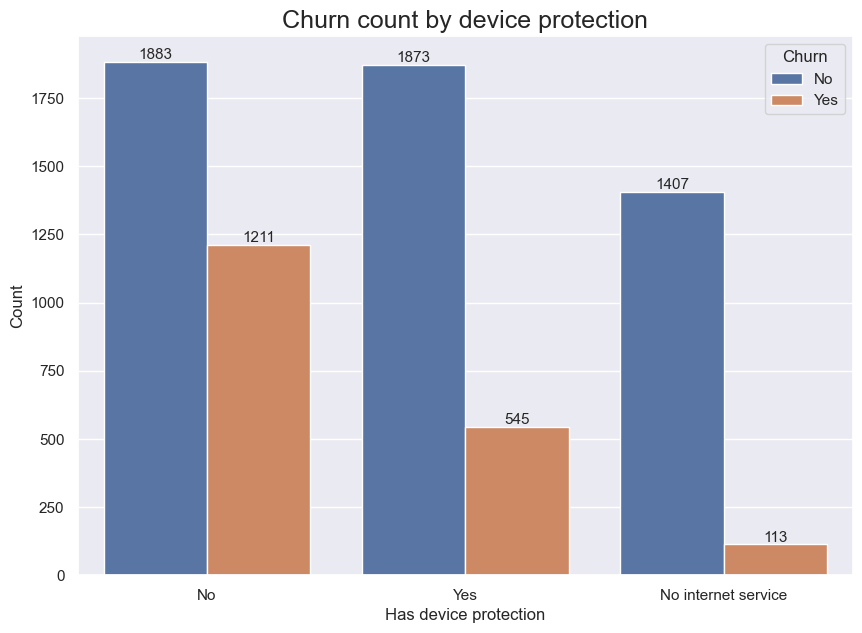

In [30]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="DeviceProtection", hue='Churn', data=df)
ax.set_title('Churn count by device protection',fontsize = 18 )
ax.set_xlabel('Has device protection', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churndvcprtctn.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)    
plt.show()

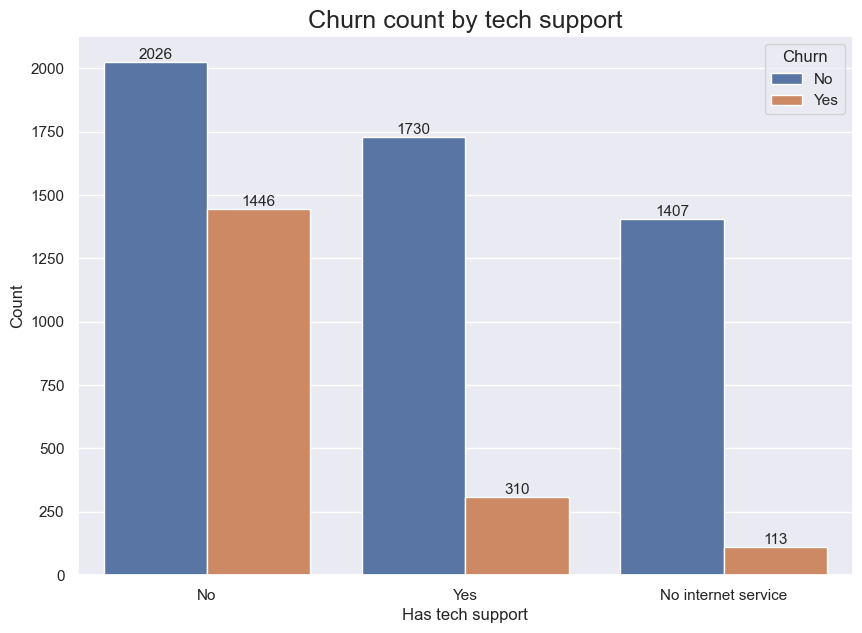

In [31]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="TechSupport", hue='Churn', data=df)
ax.set_title('Churn count by tech support',fontsize = 18 )
ax.set_xlabel('Has tech support', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churntchspprt.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

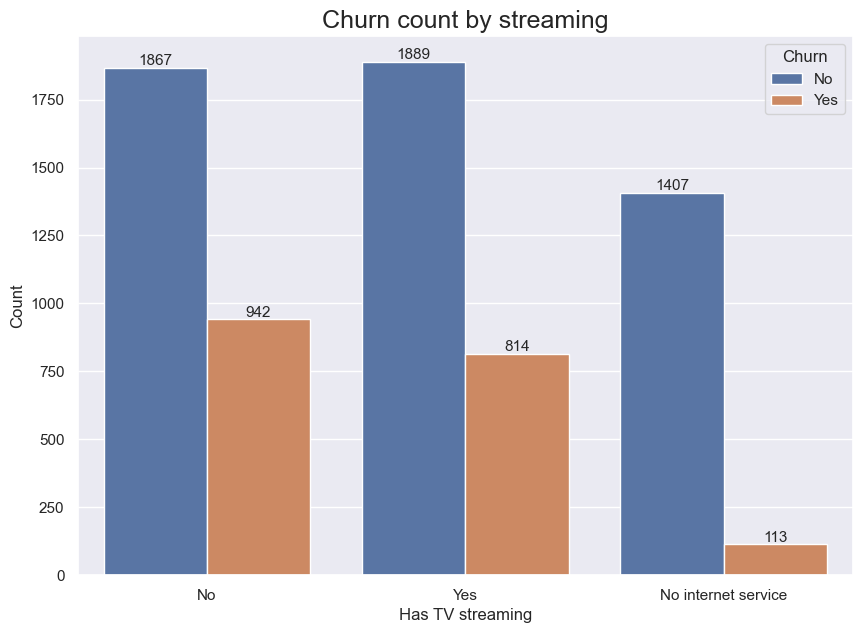

In [32]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="StreamingTV", hue='Churn', data=df)
ax.set_title('Churn count by streaming',fontsize = 18 )
ax.set_xlabel('Has TV streaming', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnstrmngtv.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

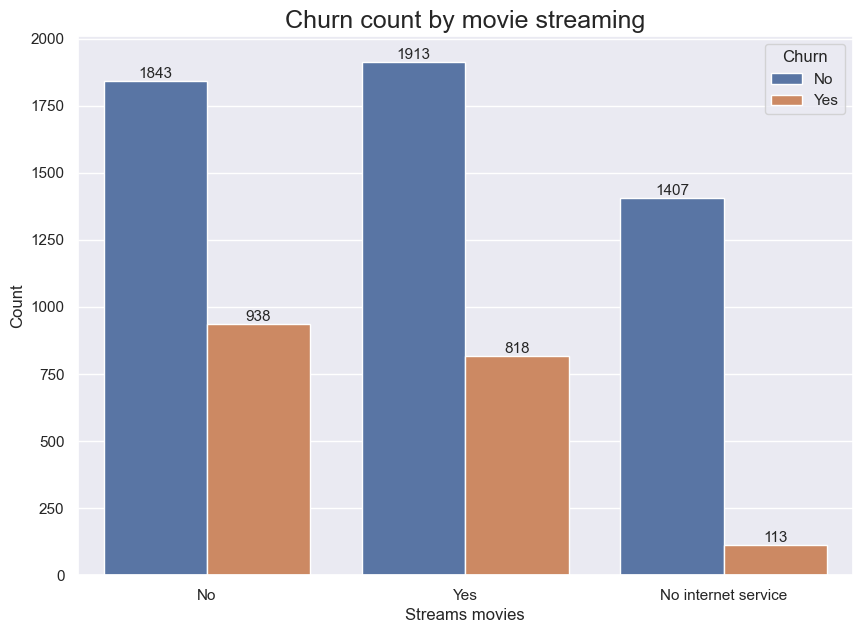

In [33]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="StreamingMovies", hue='Churn', data=df)
ax.set_title('Churn count by movie streaming',fontsize = 18 )
ax.set_xlabel('Streams movies', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnstrmngmvs.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)    
plt.show()

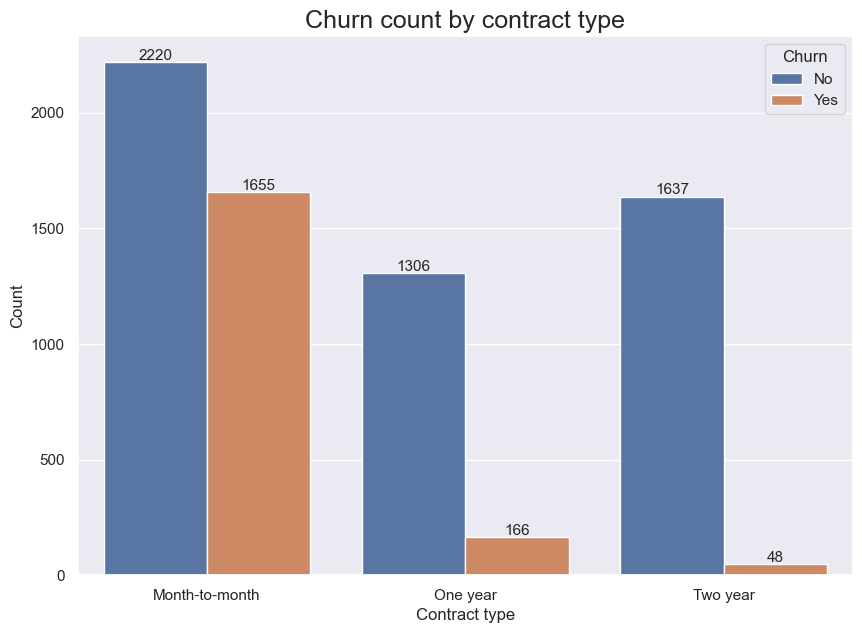

In [34]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="Contract", hue='Churn', data=df)
ax.set_title('Churn count by contract type',fontsize = 18 )
ax.set_xlabel('Contract type', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churncntrct.png', dpi=300, bbox_inches = 'tight', pad_inches = 0) 
plt.show()

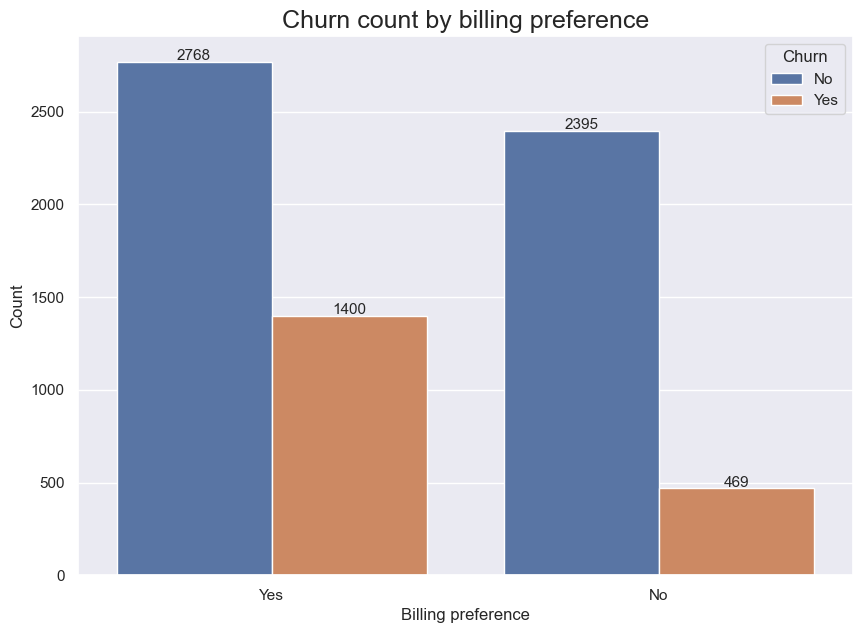

In [35]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="PaperlessBilling", hue='Churn', data=df)
ax.set_title('Churn count by billing preference',fontsize = 18 )
ax.set_xlabel('Billing preference', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnbllngprfrnc.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)     
plt.show()

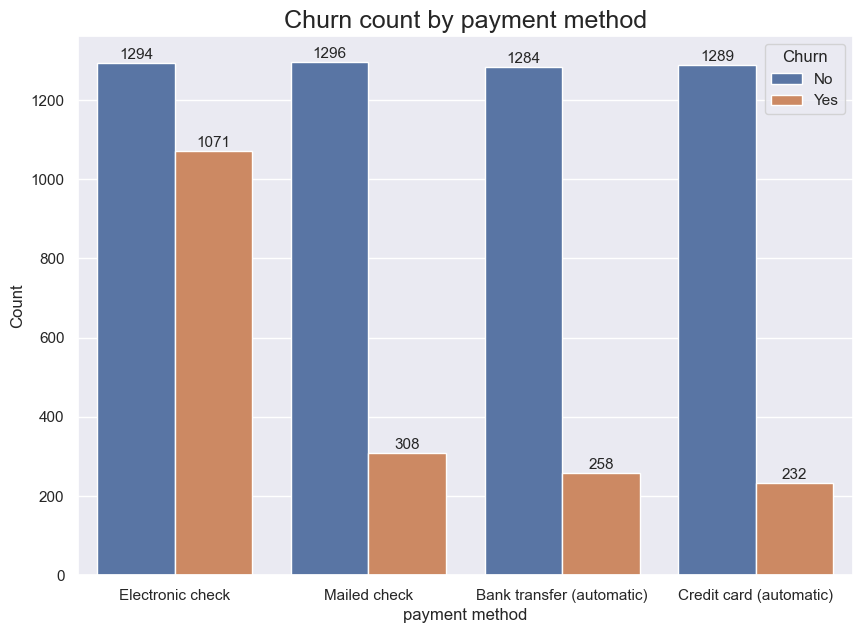

In [36]:
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="PaymentMethod", hue='Churn', data=df)
ax.set_title('Churn count by payment method',fontsize = 18 )
ax.set_xlabel('payment method', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.savefig('../04 Output/churnpymntmthd.png', dpi=300, bbox_inches = 'tight', pad_inches = 0) 
plt.show()